# WeRateDogs Data Analysis

## Table Of Contents

* [Introduction](#Introduction) 
* [Gather](#Gather)  
* [Assess](#Assess)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Quality](#Quality)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Tidiness](#Tidiness)   
* [Clean](#Clean)
* [Analysis](#Analysis)

## Introduction

In this project, I will be gathering, assessing, and cleaning data from the twitter archive of the account WeRateDogs. I will then analyse the data and present the results in both summary and visual formats.

## Gather

* Read the file **twitter-archive-enhanced.csv** into a dataframe called **t_archive**.
* Programatically download the image predictions page from the internet.
* Extract only the file **image-predictions.tsv** from the page and read it into a dataframe called **img_predict_df**.
* Set up tweepy to access twitter api along with authorization tokens, which have been redacted here.
* query the twitter api to gather tweet data in json form for all tweets that match the tweet ids in **t_archive**, while
storing the tweet ids of missing tweets.
* Write the collected data into a text file called **tweet_json.txt**, then read that file into a dataframe called **tweet_df**

In [195]:
# import relevant librairies and apis
import pandas as pd
import numpy as np
import requests as rq
import os
import json
import tweepy
import matplotlib.pyplot as plt
import seaborn as srs
import string
import re
pd.set_option('display.max_colwidth', -1)
%matplotlib inline

In [106]:
# read twitter-archive-enhanced into a dataframe
t_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [107]:
#programatically download the image predictions page from the internet
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = rq.get(url)



In [4]:
# extract only the image-predictions.tsv file from the page
with open(os.path.join(url.split('/')[-1]), 
          mode = 'wb') as file:
    file.write(r.content)

In [108]:
# read image-predictions.tsv into a dataframe
img_predict_df = pd.read_csv('image-predictions.tsv', sep = '\t')

In [7]:
# Set up tweepy to access twitter api
consumer_key = 'REDACTED'
consumer_secret = 'REDACTED'
access_token = 'REDACTED'
access_secret = 'REDACTED'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,
                parser = tweepy.parsers.JSONParser(),
                wait_on_rate_limit = True,
                wait_on_rate_limit_notify = True)

In [12]:
# query the twitter api to gather tweet data in json form for all tweets that match the tweet ids in t_archive.
tweet_list = []
missing_tweets = []
for tweet_id in t_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id,
                              tweet_mode = 'extended',)
        tweet_list.append(tweet)
    except:
        missing_tweets.append(tweet_id)

Rate limit reached. Sleeping for: 641
Rate limit reached. Sleeping for: 644


In [14]:
# write tweet json data to tweet_json.txt
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweet_list, file)

In [109]:
# read the json_text file into a df
tweet_df = pd.read_json('tweet_json.txt')

In [110]:
# filter out colums that are not necessary for the analysis.
tweet_df = tweet_df[['id', 'retweet_count', 'favorite_count', 'lang']]

## Assess

### Quality

#### t_archive

* (1) There are 109 names that do not start with a capital letter. None of these words appear to be names, and instead were      accidently taken from parts of the sentence describing the dog.
* (2) There are a total of 181 retweets in this data batch. We are only looking for original tweets.
* (3) The datatype for the column **timestamp** is wrong
* (4) There are 59 instances of missing information in the **expanded_urls** column.
* (5) There is some HTML language in the **source** column.
* (6) After joining the files, it was discovered that 7 rows are missing values for **retweet_count**, **favorite_count**, and **lang**.

In [111]:
t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [112]:
t_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [113]:
t_archive.query('name.str.contains("^[a-z]")', engine = 'python')['name'].value_counts()

a               55
the             8 
an              7 
very            5 
just            4 
quite           4 
one             4 
actually        2 
mad             2 
not             2 
getting         2 
all             1 
this            1 
light           1 
life            1 
unacceptable    1 
his             1 
old             1 
such            1 
officially      1 
incredibly      1 
by              1 
space           1 
infuriating     1 
my              1 
Name: name, dtype: int64

#### img_predict_df

* (1) 66 of the images are duplicates.
* (2) There are tweets that do not have images

In [114]:
img_predict_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [115]:
img_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [116]:
img_predict_df['jpg_url'].duplicated().sum()

66

#### tweet_df

* There appear to be no quality issues wit this dataframe.

In [117]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 4 columns):
id                2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
lang              2333 non-null object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


In [118]:
tweet_df.head()

,id,retweet_count,favorite_count,lang
0,892420643555336193,7852,36846,en
1,892177421306343426,5822,31714,en
2,891815181378084864,3848,23898,en
3,891689557279858688,8024,40176,en
4,891327558926688256,8671,38365,en


### Tidiness

#### t_archive

* (1) The 3 columns related to retweets are not needed since retweets will not be analyzed.
* (2) There are 4 different columns describing the type of dog.

In [119]:
t_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


#### img_predict_df

* (1) Change the **jpg_url** column name to the more generic **picture_url** since 2 of the sources are .png files.

In [120]:
img_predict_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [121]:
img_predict_df[~img_predict_df['jpg_url'].str.contains('jpg')]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
320,671789708968640512,https://pbs.twimg.com/tweet_video_thumb/CVKtH-4WIAAmiQ5.png,1,dalmatian,0.114259,True,teddy,0.062275,False,steam_locomotive,0.049700,False
815,692752401762250755,https://pbs.twimg.com/tweet_video_thumb/CZ0mhduWkAICSGe.png,1,Samoyed,0.471276,True,Siberian_husky,0.158850,True,Eskimo_dog,0.138672,True


#### tweet_df

* (1) After joining the files, it was discovered that the **img_num** column had somehow been converted from the 'int' datatype to the 'float' datatype.

In [122]:
tweet_df.head()

,id,retweet_count,favorite_count,lang
0,892420643555336193,7852,36846,en
1,892177421306343426,5822,31714,en
2,891815181378084864,3848,23898,en
3,891689557279858688,8024,40176,en
4,891327558926688256,8671,38365,en


## Clean

In [123]:
# copy all dataframes
tweet_clean = tweet_df.copy()
t_archive_clean = t_archive.copy()
img_predict_clean = img_predict_df.copy()

In [124]:
# join the dataframes together and remove the duplicate id column
temp_df = t_archive_clean.merge(tweet_clean, left_on = 'tweet_id', right_on = 'id', how = 'left')
temp_df.drop(columns = 'id', inplace = True)
clean_merge = temp_df.merge(img_predict_clean, on = 'tweet_id', how = 'left')

In [125]:
clean_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

### t_archive quality

#### Issue 1 - Define

The 109 instances of names not starting with capital letters are not names at all and should be converted to 'None'.

#### Issue 1 - Code

In [126]:
name_list = []
# Function checks the 'name' column to see if it starts with a lower case letter. Function is then 
# applied to all rows of dataframe.
def not_name(row):
    if row['name'][0].islower() == True:
        name_list.append('None')
    else:
        name_list.append(row['name'])
clean_merge.apply(not_name, axis = 1)
clean_merge['name'] = name_list

#### Issue 1 - Test

In [127]:
clean_merge['name'].value_counts()

None        854
Charlie     12 
Lucy        11 
Oliver      11 
Cooper      11 
Lola        10 
Penny       10 
Tucker      10 
Bo          9  
Winston     9  
Sadie       8  
Daisy       7  
Bailey      7  
Toby        7  
Buddy       7  
Milo        6  
Bella       6  
Stanley     6  
Koda        6  
Oscar       6  
Leo         6  
Jack        6  
Jax         6  
Scout       6  
Dave        6  
Rusty       6  
Louis       5  
Sunny       5  
Larry       5  
Finn        5  
           ..  
Ben         1  
Buckley     1  
Blipson     1  
Timofy      1  
Gert        1  
Augie       1  
Yukon       1  
Socks       1  
Koko        1  
Rupert      1  
Gustav      1  
Brooks      1  
Margo       1  
Willow      1  
Kloey       1  
Craig       1  
Jiminus     1  
Aja         1  
Tedders     1  
Obie        1  
Alf         1  
BeBe        1  
Rizzo       1  
Chesney     1  
Ralphé      1  
Butters     1  
Tobi        1  
Bubba       1  
Hermione    1  
Fido        1  
Name: name, Length: 932,

#### Issue 2 - Define

Use a query to filter out retweets so that only originals remain.

#### Issue 2 - Code

In [128]:
clean_merge = clean_merge.query('retweeted_status_id != retweeted_status_id')

#### Issue 2 - Test

In [129]:
clean_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
retweet_count                 2168 non

#### Issue 3 - Define

Convert the **timestamp** column to a datetime datatype.

#### Issue 3 - Code

In [130]:
clean_merge['timestamp'] = clean_merge['timestamp'].astype('datetime64[ns]')

#### Issue 3 - Test

In [131]:
clean_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
retweet_count                 

#### Issue 4 - Define

Use The Pandas fillna function to replace the NaNs in the **expanded_urls** column with 'None'.

#### Issue 4 - Code

In [132]:
clean_merge_url = clean_merge['expanded_urls'].fillna('None')
clean_merge['expanded_urls'] = clean_merge_url

#### Issue 4 - Test

In [133]:
clean_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2175 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
retweet_count                 

#### Issue 5 - Define

Create a function to extract only the website from the **source** column and apply it to the entire dataframe.

#### Issue 5 - Code

In [134]:
source_list = []
# Function extracts a substring made up of all characters in between the first 2 quotation marks.
def slice_source(row):
     source = re.search('\"(.+?)\"', row['source']).group(1)
     source_list.append(source)
clean_merge.apply(slice_source, axis = 1)
clean_merge['source'] = source_list

#### Issue - 5 Test

In [135]:
clean_merge['source'].value_counts()

http://twitter.com/download/iphone              2042
http://vine.co                                  91  
http://twitter.com                              31  
https://about.twitter.com/products/tweetdeck    11  
Name: source, dtype: int64

In [136]:
clean_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2175 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
retweet_count                 

In [137]:
clean_merge.query('retweet_count != retweet_count')['retweet_count']

104    NaN
253    NaN
296    NaN
363    NaN
750    NaN
932    NaN
1726   NaN
Name: retweet_count, dtype: float64

#### Issue 6 - Define

Use the fillna fuction on the **retweet_count**, **favorite_count**, and **lang** columns. The first 2 will be replaced with 0s, and the final one will be replaced with 'None'.

#### Issue 6 - Code

In [138]:
clean_merge['retweet_count'] = clean_merge['retweet_count'].fillna(0)
clean_merge['favorite_count'] = clean_merge['favorite_count'].fillna(0)
clean_merge['lang'] = clean_merge['lang'].fillna('None')

#### Issue 6 - Test

In [139]:
clean_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2175 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
retweet_count                 

In [140]:
clean_merge.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com/download/iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### img_predict_df quality

#### Issue 1 - Define

I will run a query that will filter out tweets that have duplicate images.

#### Issue 1 - Code

In [141]:
clean_merge = clean_merge[clean_merge['jpg_url'].duplicated() == False]

#### Issue 1 - Test

In [142]:
clean_merge['jpg_url'].duplicated().sum()

0

#### Issue 2 - Define

I will run a query to filter out the tweets that do not have images.

#### Issue 2 - Code

In [143]:
clean_merge = clean_merge.query('jpg_url == jpg_url')

#### Issue 2 - Test

In [144]:
clean_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
retweet_count                 

### t_archive Tidiness

#### Issue 1 - Define

I will drop the 3 columns pertaining to retweets.

#### Issue 1 - Code

In [145]:
clean_merge.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True)

#### Issue 1 - Test

In [146]:
clean_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
retweet_count            1994 non-null float64
favorite_count           1994 non-null float64
lang                     1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1           

#### Issue 2 - Define

I will create a column that contains what stage the dog is and delete the other 4.

#### Issue 2 - Code

In [147]:
dog_stage = []
def stage_melt(row):
    if row['doggo'] == 'doggo':
        dog_stage.append('doggo')
    elif row['floofer'] == 'floofer':
        dog_stage.append('floofer')
    elif row['pupper'] == 'pupper':
        dog_stage.append('pupper')
    elif row['puppo'] == 'puppo':
        dog_stage.append('puppo')
    else:
        dog_stage.append('None')
clean_merge.apply(stage_melt, axis = 1)
dog_stage

['None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'doggo',
 'None',
 'None',
 'puppo',
 'None',
 'puppo',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'pupper',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'doggo',
 'None',
 'None',
 'floofer',
 'None',
 'None',
 'pupper',
 'None',
 'None',
 'None',
 'None',
 'None',
 'pupper',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'puppo',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'pupper',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'pupper',
 'None',
 'puppo',
 'None',
 'pupper',
 'doggo',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'pupper',
 'doggo',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'doggo',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'puppo',
 'None',
 'None',
 

In [148]:
clean_merge['dog_stage'] = dog_stage

In [149]:
clean_merge.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

#### Issue 2 - Test

In [150]:
clean_merge.head(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com/download/iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,http://twitter.com/download/iphone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,...,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,...,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,http://twitter.com/download/iphone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,...,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,...,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,http://twitter.com

### img_predict_df Tidiness

#### Issue 1 - Define

i will rename the **jpg_url** column to **picture_url**

#### Issue 1 - Code

In [151]:
clean_merge.rename(columns = {'jpg_url' : 'picture_url'}, inplace = True)

#### Issue 1 - Test

In [152]:
clean_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
retweet_count            1994 non-null float64
favorite_count           1994 non-null float64
lang                     1994 non-null object
picture_url              1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf     

### tweet_df Tidiness

#### Issue 1 - Define

I will convert the **img_num** column from float back to int.

#### Issue 1 - Code

In [153]:
clean_merge['img_num'] = clean_merge['img_num'].astype(int)

#### Issue 1 - Test

In [154]:
clean_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
retweet_count            1994 non-null float64
favorite_count           1994 non-null float64
lang                     1994 non-null object
picture_url              1994 non-null object
img_num                  1994 non-null int32
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf       

## Analysis

Create column to catagorize dogs by gender.

In [155]:
clean_merge['text'] = clean_merge['text'].astype(str)

In [156]:
gender_list = []
male_list = ['He', 'he', 'he\'s','He\'s', 'him', 'Him', 'male', 'His', 'his']
female_list = ['She', 'she', 'she\'s', 'She\'s', 'her', 'Her', 'female']

def gender(row):
    contains_check = 0
    for fword in female_list:
        if fword in row['text']:
            contains_check = 1
            gender_list.append('female')
            break
    if contains_check == 0:
        for mword in male_list:
            temp = row['text'].split()
            for word in temp:
                if mword == word and contains_check ==0:
                    contains_check = 1
                    gender_list.append('male')
                   
    if contains_check == 0:
        gender_list.append('None')
clean_merge.apply(gender, axis = 1)
len(gender_list)

1994

In [157]:
clean_merge['gender'] = gender_list

In [158]:
clean_merge.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,gender
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None,male
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None,female
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None,male
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None,female
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com/download/iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None,male


In [159]:
# Store final data into a new csv file called 'twitter_archive_master.csv'
clean_merge.to_csv('twitter_archive_master.csv', index = False)

### Insight 1

Here, I plotted the top 5 number of predictions for those predictions that were lower than the type 1 error rate of 5 percent and those that were higher. Also, I eliminated predictions for things other than dogs. Based on the results, it appears that the dog predictor has an easier time with golden retrievers than with samoyeds.

In [160]:
clean_merge.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,gender
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None,male
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None,female
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None,male
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None,female
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com/download/iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None,male


In [161]:
# Use query to isolate rows where p1_conf is 95% or greater and p1_dog is true. Also made query for rows where p1_conf is lower
# than 95% and p1_dog is true. I sorted the p1 values for each query.
significant_predict = clean_merge.query('p1_conf >= 0.95 and p1_dog == True').sort_values('p1')
nosig_predict = clean_merge.query(' p1_conf < 0.95 and p1_dog == True').sort_values('p1')

In [162]:
# Isolated top 5 predictions for significant_predict and generated labels for them
top5_sig = significant_predict['p1'].value_counts().head(5)
sig_labels = list(top5_sig.index)

In [163]:
# Isolated top 5 predictions for nosig_predict and generated labels for them
top5_nosig = nosig_predict['p1'].value_counts().head(5)
nosig_labels = list(top5_nosig.index)

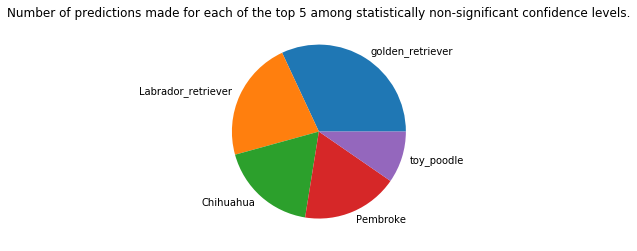

In [196]:
#plotted top5_nosig in a pie chart and gave it a title
plt.pie(top5_nosig, labels = nosig_labels)
plt.title('Number of predictions made for each of the top 5 among statistically non-significant confidence levels.');

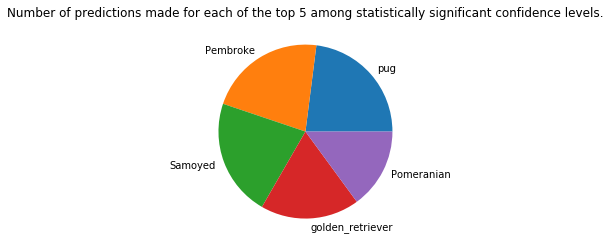

In [197]:
#plotted top5_sig in a pie chart and gave it a title
plt.pie(top5_sig, labels = sig_labels)
plt.title('Number of predictions made for each of the top 5 among statistically significant confidence levels.');

### Insight 2

Here, I plotted the median number of retweets and favorites for dogs with names and dogs without names. The median dog with a name gets approx. 29% more retweets than the median dog without a name. The median dog with a name also gets approx. 35% more favotites than the median dog wothout a name.

In [166]:
clean_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
retweet_count            1994 non-null float64
favorite_count           1994 non-null float64
lang                     1994 non-null object
picture_url              1994 non-null object
img_num                  1994 non-null int32
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf       

In [167]:
# Create variables for median retweet count for those with names and those without. Create variable for median like count
# for those with names and those without.
median_retweet_noname = clean_merge.query('name == "None"')['retweet_count'].median()
median_favorite_noname = clean_merge.query('name == "None"')['favorite_count'].median()
median_retweet_name = clean_merge.query('name != "None"')['retweet_count'].median()
median_favorite_name = clean_merge.query('name != "None"')['favorite_count'].median()

In [168]:
median_retweet_noname / (median_retweet_name)

0.7186353631694791

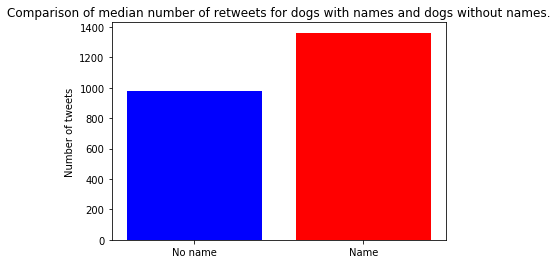

In [206]:
height = [median_retweet_noname, median_retweet_name]
labels = ['No name', 'Name']
colors = ['b', 'r']
position = [1,2]
plt.bar(position, height, tick_label = labels, color = colors)
plt.ylabel('Number of tweets')
plt.title('Comparison of median number of retweets for dogs with names and dogs without names.');

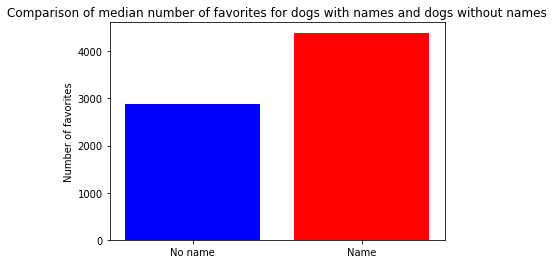

In [205]:
height = [median_favorite_noname, median_favorite_name]
labels = ['No name', 'Name']
colors = ['b', 'r']
position = [1,2]
plt.bar(position, height, tick_label = labels, color = colors)
plt.ylabel('Number of favorites')
plt.title('Comparison of median number of favorites for dogs with names and dogs without names');

### Insight 3

Here, I compared the number of retweets and favorites between dogs with no gender given, male, and female. In both cases, the male dogs scored higher than the females, who in turn scored higher than the dogs with no given gender. All numbers given are median representaions of the larger data.

In [172]:
retweet = clean_merge.groupby('gender')['retweet_count'].median()

In [173]:
retweet

gender
None      1051.0
female    1173.5
male      1345.0
Name: retweet_count, dtype: float64

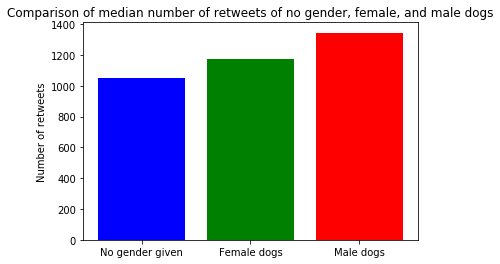

In [203]:
height = [retweet.loc['None'], retweet.loc['female'], retweet.loc['male']]
labels = ['No gender given', 'Female dogs', 'Male dogs']
colors = ['b', 'g' , 'r']
position = [1,2,3]
plt.bar(position, height, tick_label = labels, color = colors)
plt.ylabel('Number of retweets')
plt.title('Comparison of median number of retweets of no gender, female, and male dogs');

In [181]:
favorite = clean_merge.groupby('gender')['favorite_count'].median()

In [186]:
favorite

gender
None      3211.5
female    3670.5
male      4339.5
Name: favorite_count, dtype: float64

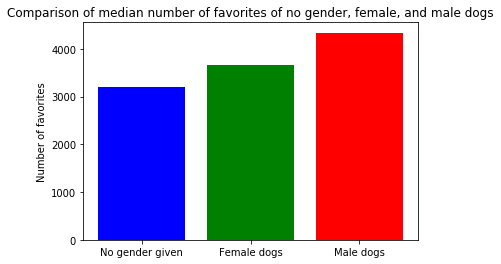

In [202]:
height = [favorite.loc['None'], favorite.loc['female'], favorite.loc['male']]
labels = ['No gender given', 'Female dogs', 'Male dogs']
colors = ['b', 'g' , 'r']
position = [1,2,3]
plt.bar(position, height, tick_label = labels, color = colors)
plt.ylabel('Number of favorites')
plt.title('Comparison of median number of favorites of no gender, female, and male dogs');